<a href="https://colab.research.google.com/github/SherriSc/UTAustinAIMLPython/blob/main/Schilling_NLP_Project_Full_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

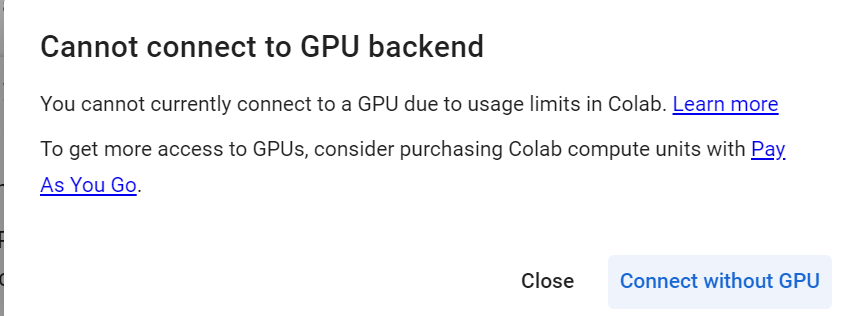

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.7 MB/s eta 0:00:00


In [ ]:
# Installing the libraries to remove accented characters and use word embeddings
!pip install unidecode gensim -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Install the library for Word2Vec, GloVe, and FastText
! pip install zeugma

  Preparing metadata (setup.py) ... done
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8791 sha256=395cef85d5af8c5983ff908d0273dfedd9765265dff0d0e6743496d41d0062e6
  Stored in directory: /root/.cache/pip/wheels/cc/b5/14/aba5433859ce5edc62c8676f4864a4ffba6e1ebc06934f1f99
Successfully built zeugma


In [ ]:
# Installing the libary for Skipgram and CBOW
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313478 sha256=f1123f65b85e879abcee8e3cf47b531077cbefe1a85afc8aa1a11f3270058c83
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
# Installing the necessary libraries for transformers
!pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 29.8 MB/s eta 0:00:00


In [ ]:
# To read and manipulate data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)   # Setting column to the max column width per the data

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions for manipulating text data
import re

# To maniuplate string data
import string

# To remove the accented characters
from unidecode import unidecode

# To load the nautral language toolkit
import nltk
nltk.download('stopwords')   # loading the stop words
nltk.download('wordnet')   # loading the wordnet module that is used in stemming
nltk.download('punkt')   # loading the punkt module that is used in tokenization
nltk.download('omw-1.4')   # dependency for tokenization

# To remove common stop words
from nltk.corpus import stopwords

# To visualize text data using word cloud
from wordcloud import STOPWORDS

# To perform stemming
from nltk.stem.porter import PorterStemmer

# To perform tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
import spacy
nlp = spacy.load('en_core_web_sm')   # loading the environment config

# Used in tokenization
from spacy.lang.en import English

# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier

# To find best model parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Deep learning library
import torch

# To load transformer models
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, T5ForConditionalGeneration, pipeline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **Loading the dataset**

In [ ]:
# Mount Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data, putting it into a pandas df, and reducing the size of the data by using UTF-8 encoding on the data
news = pd.read_csv('/content/drive/MyDrive/stock_news.csv', encoding = 'utf-8')

In [ ]:
# Creating a copy of the data
data = news.copy()

## **Data Overview**

In [ ]:
# Checking the first five rows of the data
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
# Checking the last five rows of the data
data.tail()

,Date,News,Open,High,Low,Close,Volume,Label
344,2019-04-30,"Media mogul Oprah Winfrey, known for influencing millions with her opinions on diets and books, is considering which Democratic presidential candidate to endorse in 2020. She told the Hollywood Reporter she's ""quietly figuring out where I'm going to use my voice"" and will make a clear announcement",50.764999,50.849998,49.7775,48.70879,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks underperforming amid a decline in China's manufacturing activity and awaiting euro zone economic growth numbers. The pan-European STOXX 600 index dropped 0.7% while major indices fell except London's FTSE 100. Danske Bank plunged",50.764999,50.849998,49.7775,48.70879,186139600,-1
346,2019-04-30,"This article reports that the S&P 500 reached another record high close on Tuesday, marking its best four-month stretch since late 2010. Apple's strong quarterly results and positive earnings forecast helped ease concerns about the bull run's sustainability, despite a revenue miss from Google parent Alphabet. The",50.764999,50.849998,49.7775,48.70879,186139600,-1
347,2019-04-30,"The Federal Reserve is anticipated to keep interest rates unchanged in their upcoming meeting, with a likelihood of a rate cut expected later this year. The Fed Chairman's press conference may provide significant market impact as investors seek insights on economic growth and inflation. Apple's earnings report exceeded expectations, leading to a post-market surge in shares, while",50.764999,50.849998,49.7775,48.70879,186139600,-1
348,2019-04-30,"In the first quarter, South Korea's Samsung Electronics reported its weakest profit in over two years due to falls in chip prices and slowing demand for display panels. The tech giant expects improved results in the second half of 2019, driven by a pickup in memory chip and smartphone sales. However, memory chip",50.764999,50.849998,49.7775,48.70879,186139600,0


In [ ]:
# Checkign the shape of the data
data.shape

(349, 8)

Hmm... this data set contains only 349 articles with 8 columns. 349 doesn't seem like a lot of data to be predicting stock prices. We'll see how it does.

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


Okay thare are no missing values, so we won't have to deal with that in our data preprocessing. That's good!

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

Okay there are also no dupicate values. If there were, we would drop them. Since it's a small dataset, as noted above, it's good that we don't have to drop any additional data.

<Axes: xlabel='Label', ylabel='count'>

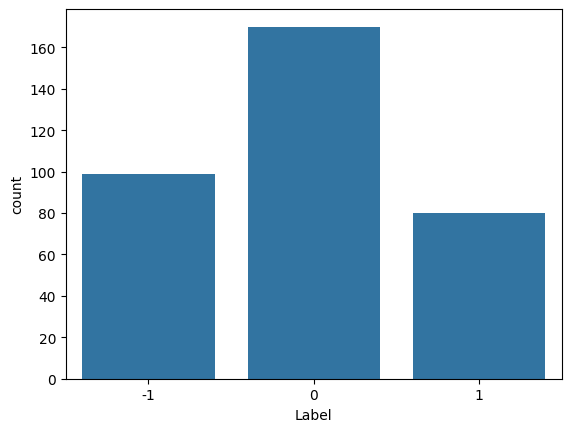

In [ ]:
# Checking the distribution of article labels (recall -1 is negative, 0 is neutral, and 1 is positive)
sns.countplot(data = data, x = 'Label')

The number of negative and postive articles are close, with about 80 to 100 of each. But the number of neutral articles is nearly double the number of positive articles. It will be interesting to see if we can make good predictions without dealing with the unbalanced dataset.

In [ ]:
# Get summary statistics
print(data.describe())

             Open        High         Low       Close        Volume  \
count  349.000000  349.000000  349.000000  349.000000  3.490000e+02   
mean    46.229233   46.700458   45.745394   44.926317  1.289482e+08   
std      6.442817    6.507321    6.391976    6.398338  4.317031e+07   
min     37.567501   37.817501   37.305000   36.254131  4.544800e+07   
25%     41.740002   42.244999   41.482498   40.246914  1.032720e+08   
50%     45.974998   46.025002   45.639999   44.596924  1.156272e+08   
75%     50.707500   50.849998   49.777500   49.110790  1.511252e+08   
max     66.817497   67.062500   65.862503   64.805229  2.444392e+08   

            Label  
count  349.000000  
mean    -0.054441  
std      0.715119  
min     -1.000000  
25%     -1.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

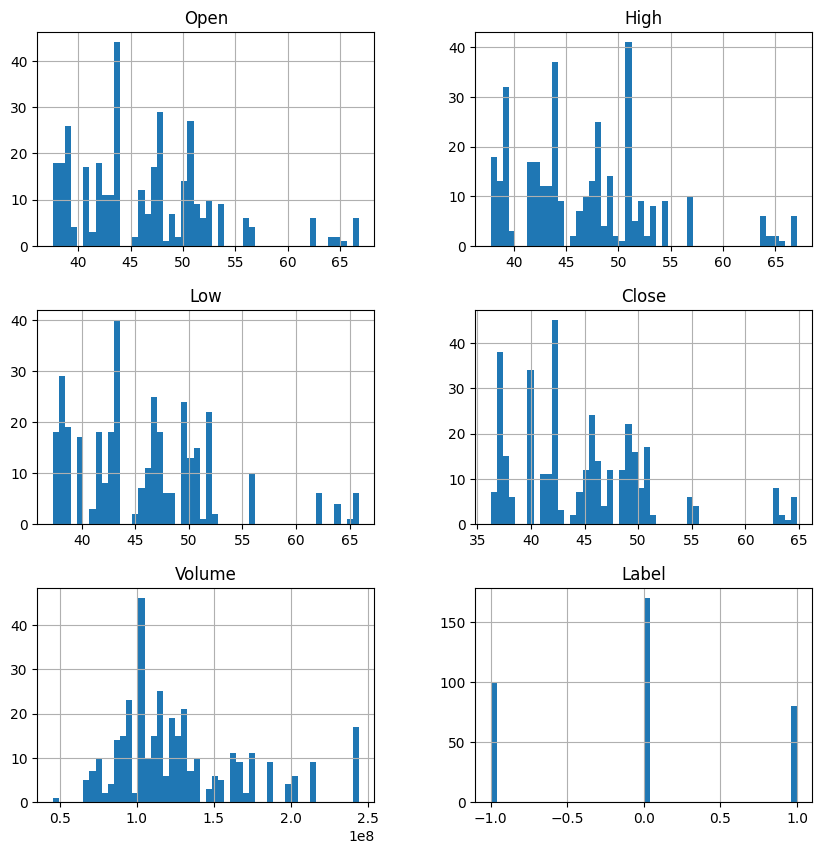

In [ ]:
# Creating histograms to examine the numeric columns
data.hist(bins = 50, figsize = (10, 10))
plt.show()

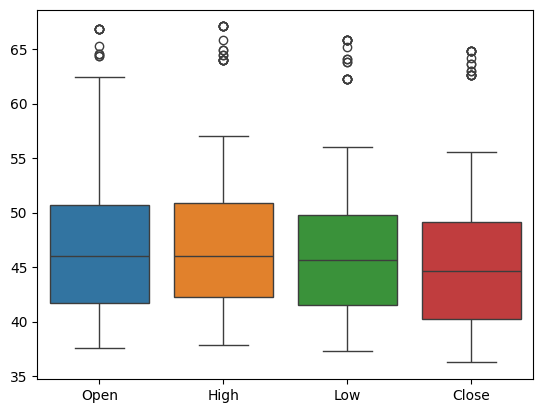

In [ ]:
# Creating boxplots to further examine numeric data
## The scale of the volume data was making the other boxplots not really visible; so I'll do another box plot just for the Volume data
sns.boxplot(data = data[['Open', 'High', 'Low', 'Close']])
plt.show()

The averages for open, close, high, and low are all very similar, as are the quartiles.  But the open data has a much higher top value.  All the fields have a lot of outliers to the top.

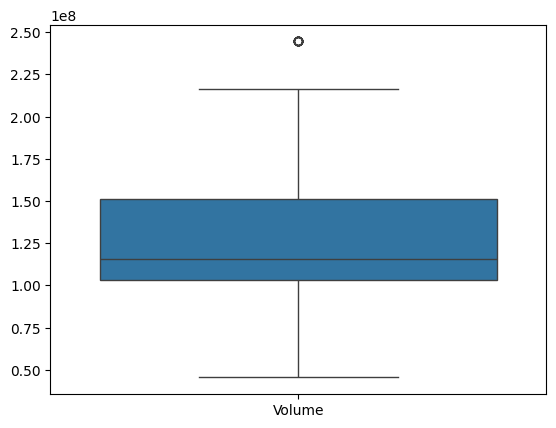

In [ ]:
# Creating a boxplot just for the Volume data
sns.boxplot(data = data[['Volume']])
plt.show()

Trading volume ranges from 50 million to 250 million, with the average being just under 125 million, and some outliers to the top. So this data is slightly right skewed.

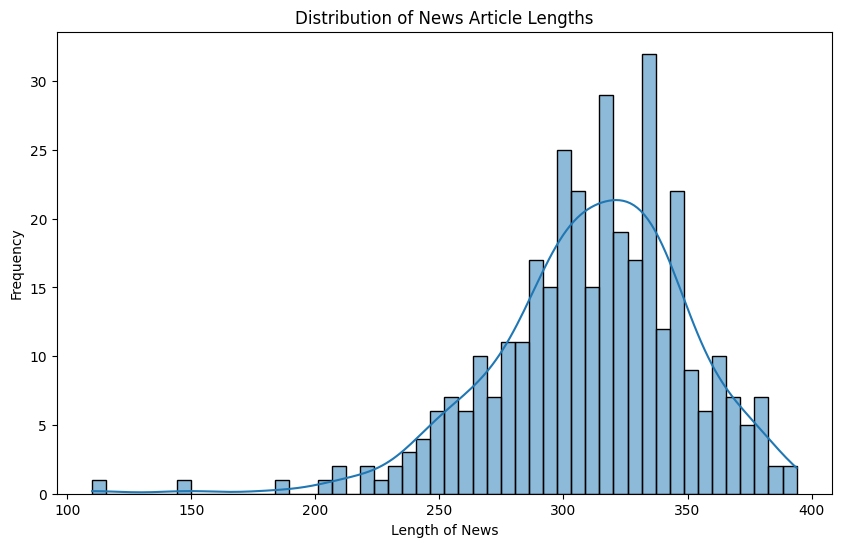

In [ ]:
# Computing the length of each news article
data['News_Length'] = data['News'].apply(lambda x: len(x))

# Plotting the distribution of the length of the News column
plt.figure(figsize = (10, 6))
sns.histplot(data['News_Length'], bins = 50, kde = True)
plt.title('Distribution of News Article Lengths')
plt.xlabel('Length of News')
plt.ylabel('Frequency')
plt.show()

The length of the news articles ranges from a little over 100 words to almost 400 words, with the average being around just over 300 words. There are some very, very short articles, so the data is left skewed.

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

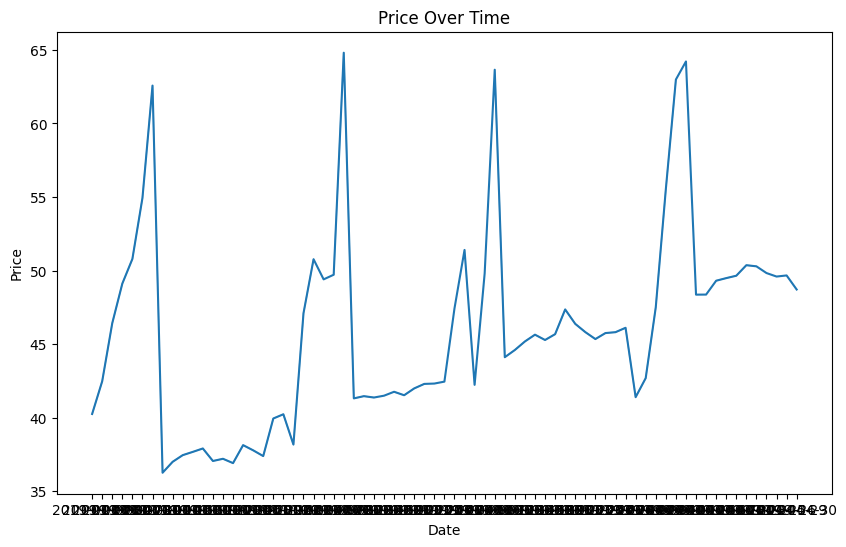

In [ ]:
# First let's look at the distribution of price over time
plt.figure(figsize = (10, 6))
sns.lineplot(data = data, x = 'Date', y = 'Close')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

So the price for this stock has trended up over time, with some massive spikes and drops along the way.

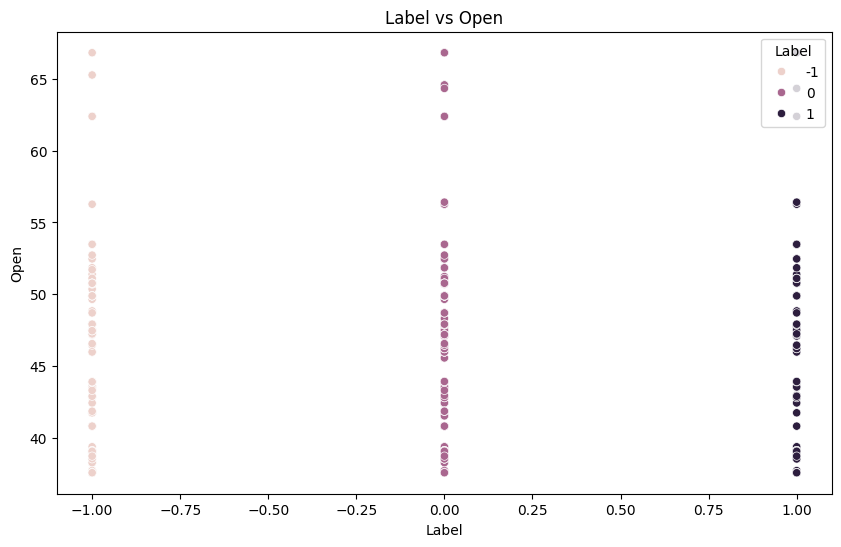

In [ ]:
# Comparing the Label to Open
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Label', y = 'Open', hue = 'Label')
plt.title('Label vs Open')
plt.xlabel('Label')
plt.ylabel('Open')
plt.show()

Interesting that when the news is positive for that day the highest open values are lower than when the news is negative or neutral. This may be an anomaly because the news may come out most of the time after the market Open.

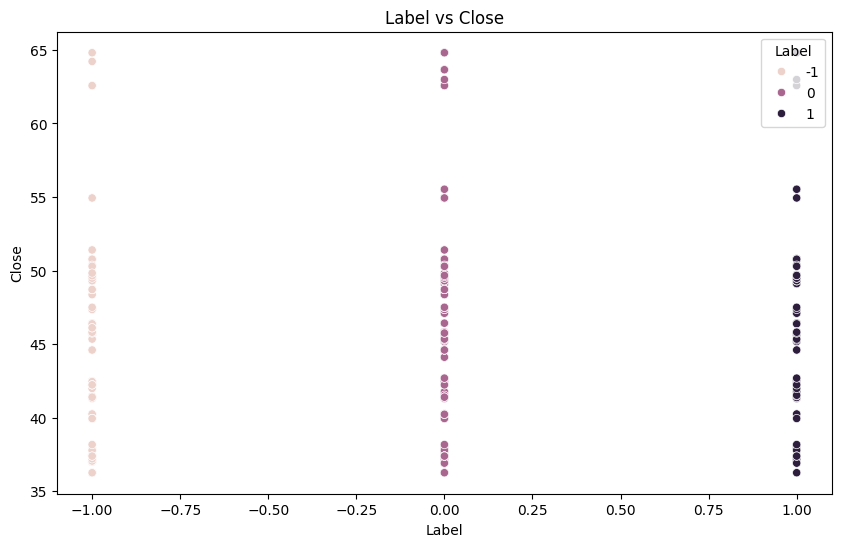

In [ ]:
# Comparing the Label to Close
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Label', y = 'Close', hue = 'Label')
plt.title('Label vs Close')
plt.xlabel('Label')
plt.ylabel('Close')
plt.show()

Okay this is very strange. The Close also seems to be lower when the news was positive. That doesn't make any sense.  ❓

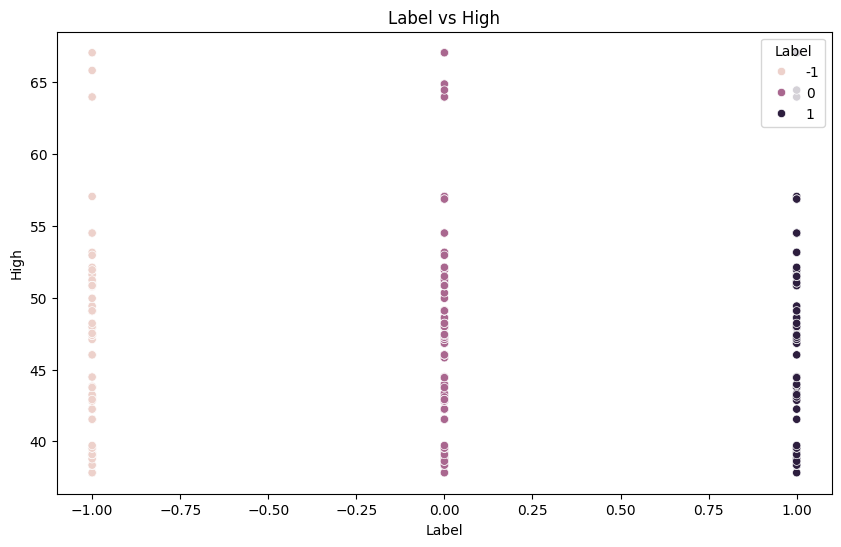

In [ ]:
# Next, let's compare the High to the Label
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Label', y = 'High', hue = 'Label')
plt.title('Label vs High')
plt.xlabel('Label')
plt.ylabel('High')
plt.show()

Another mystery! When the news is good, the High price for the day tends to be lower than when the news is negative or neutral.  ❓

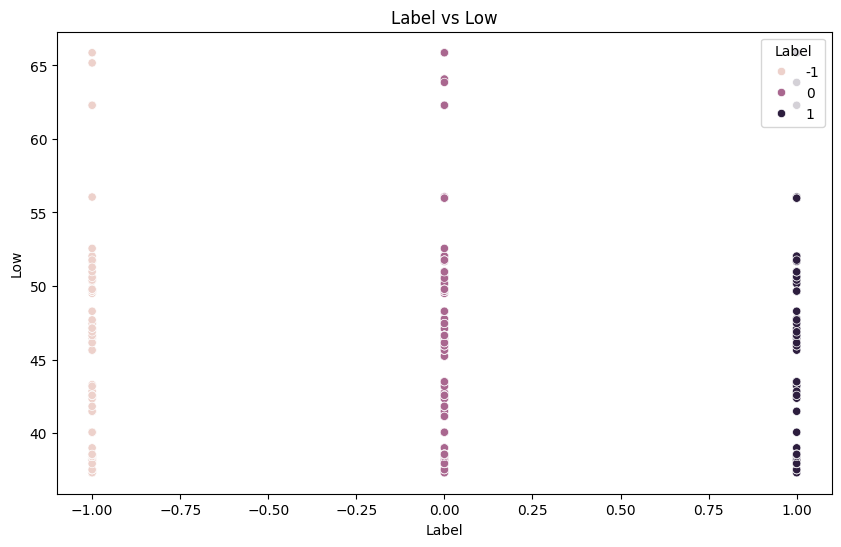

In [ ]:
# Next let's compare the Low price to the Label
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Label', y = 'Low', hue = 'Label')
plt.title('Label vs Low')
plt.xlabel('Label')
plt.ylabel('Low')
plt.show()

Okay all this data is very strange, and it makes me think that maybe the news articles have no impact on the Opening, Closing, High, or Low prices.

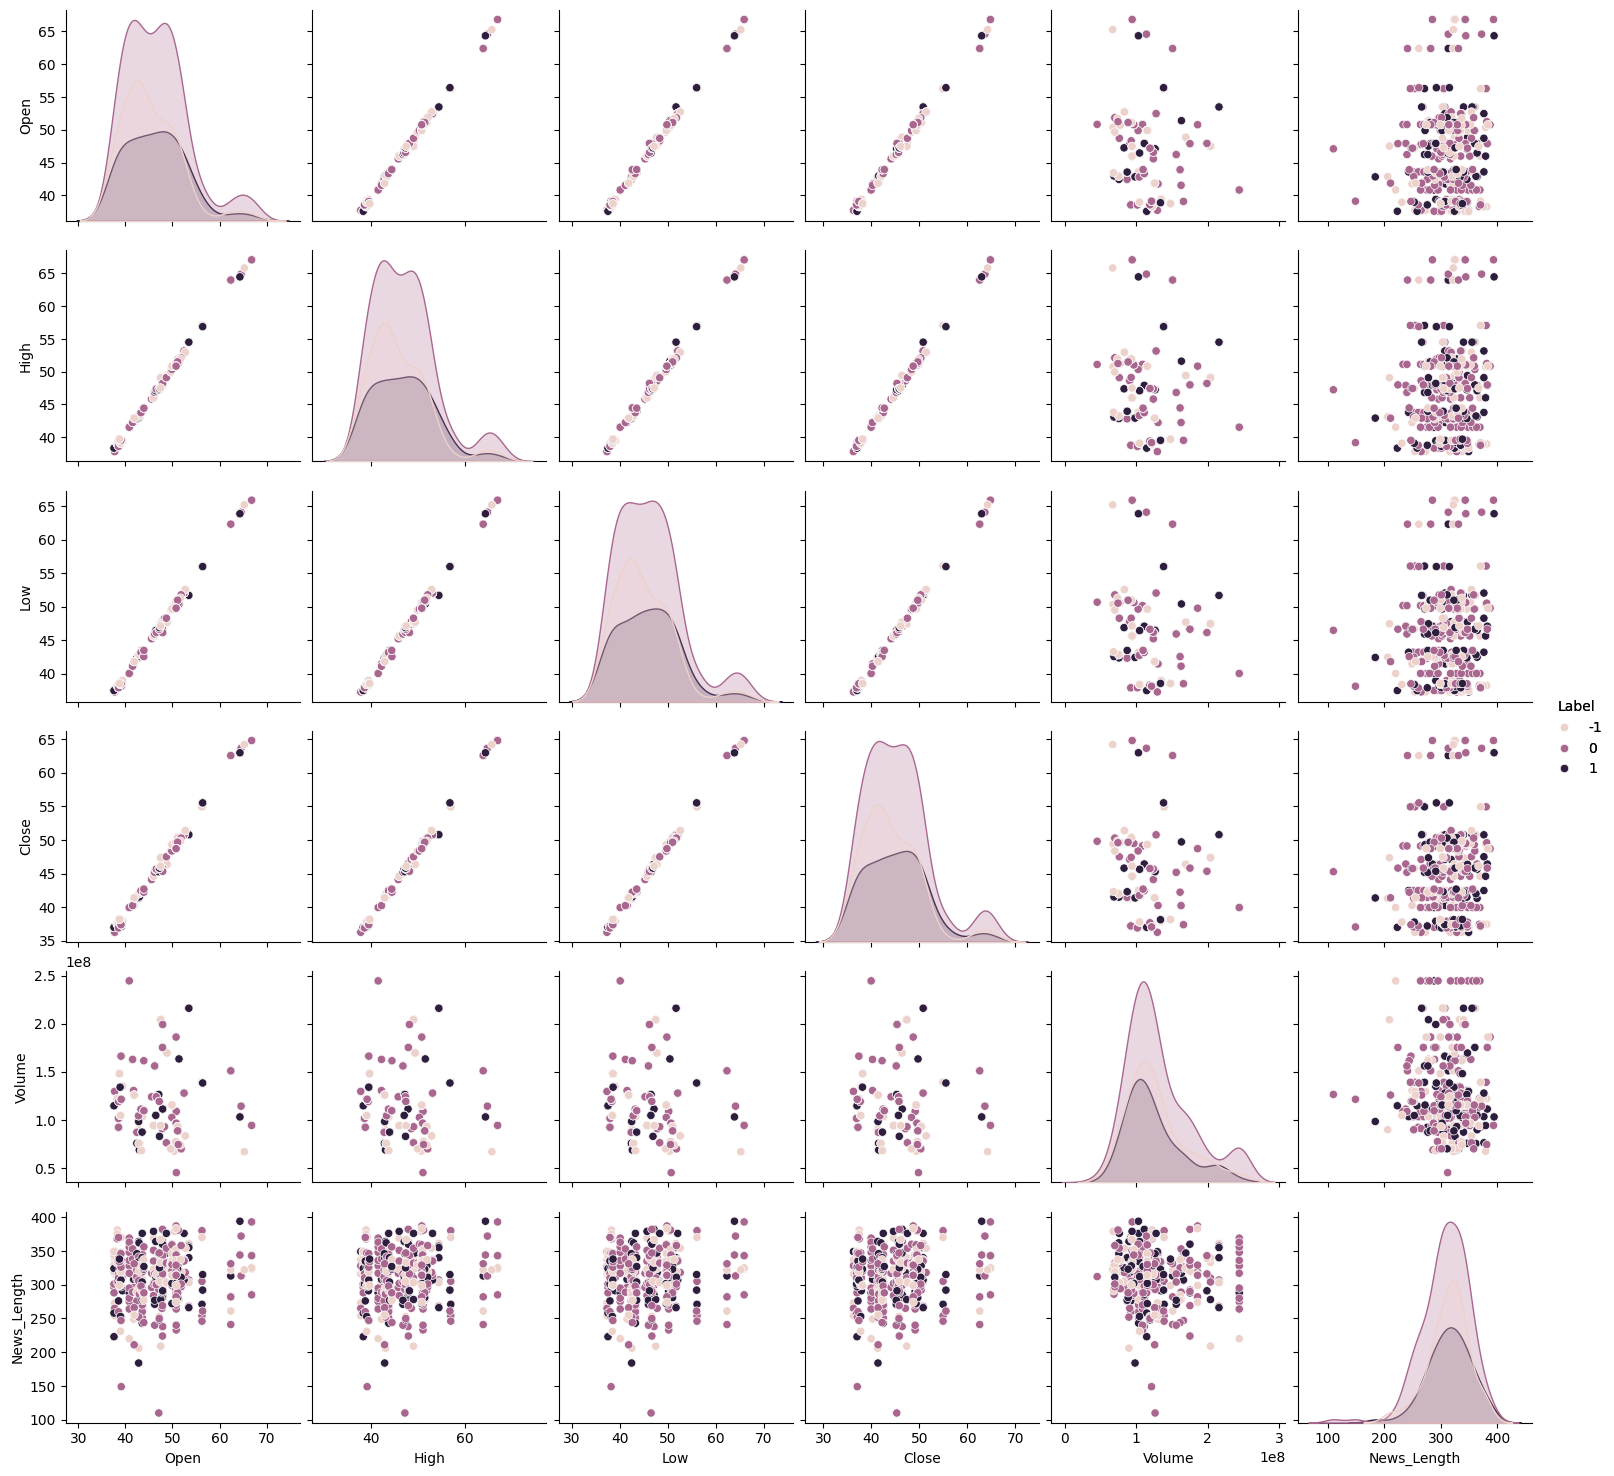

In [ ]:
# Plotting the pair plots
pairplot = sns.pairplot(data, hue = 'Label')
pairplot.add_legend()
plt.show()

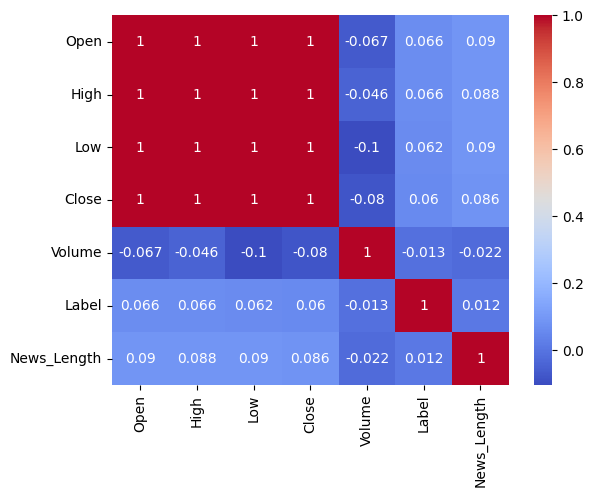

In [ ]:
# Plotting the correlation matrix
corr_matrix = data.drop(columns=['Date', 'News']).corr() # Dropping the 'Date' and 'News' columns, which are strings, before calculating correlation
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()


Okay, as I suspected, there does not seem to be any correlation between the news label and the any of the 4 daily stock prices.  Very interesting!  I wonder if it's because there are multiple articles per day, and they may have different sentiments. Maybe I should combine the scores of all the articles for each day to get a general overview of the total sentiment of the news for the day, both positive and negative.


### Revisiting the Univariate analysis to see if there are multiple articles for each day

In [ ]:
# Let's look at how many articles there are for each day. This is going back to our Univariate analysis.
articles_per_day = data['Date'].value_counts().sort_index()
print(articles_per_day)

Date
2019-01-02    14
2019-01-03    28
2019-01-04    10
2019-01-07    10
2019-01-08     9
              ..
2019-04-24     5
2019-04-25     1
2019-04-26     1
2019-04-29     3
2019-04-30     9
Name: count, Length: 71, dtype: int64


In [ ]:
## Okay, I'm torn between using the median or the mode to summarize the news for the day. Let's create both and look at them
# Gropuing by date and then selecting the median label for each day
median_labels_per_day = data.groupby('Date')['Label'].median()

# Groupiong by date and then selecting the mode label for each day
mode_labels_per_day = data.groupby('Date')['Label'].apply(lambda x: x.mode()[0])

# Appending the new values as two new columns to the dataframe
data['Median_Label'] = data['Date'].map(median_labels_per_day)
data['Mode_Label'] = data['Date'].map(mode_labels_per_day)

# Sorting the dataframe by date
data_sorted = data.sort_values('Date')

print(data_sorted[['Date', 'Label', 'Median_Label', 'Mode_Label']].head(50))

          Date  Label  Median_Label  Mode_Label
0   2019-01-02     -1          -1.0          -1
12  2019-01-02     -1          -1.0          -1
11  2019-01-02     -1          -1.0          -1
10  2019-01-02      0          -1.0          -1
9   2019-01-02     -1          -1.0          -1
8   2019-01-02     -1          -1.0          -1
7   2019-01-02     -1          -1.0          -1
13  2019-01-02      0          -1.0          -1
5   2019-01-02      0          -1.0          -1
4   2019-01-02     -1          -1.0          -1
3   2019-01-02     -1          -1.0          -1
2   2019-01-02     -1          -1.0          -1
1   2019-01-02     -1          -1.0          -1
6   2019-01-02      1          -1.0          -1
30  2019-01-03     -1          -0.5          -1
31  2019-01-03     -1          -0.5          -1
32  2019-01-03     -1          -0.5          -1
33  2019-01-03     -1          -0.5          -1
34  2019-01-03      0          -0.5          -1
35  2019-01-03      0          -0.5     

Okay I'm glad that I looked at both. The median has a bunch of 0.5 values, which are not real values in the data. So I'll use the mode_label.

### Revisiting the Multi Variate analysis with the new Mode_Level for the y variable

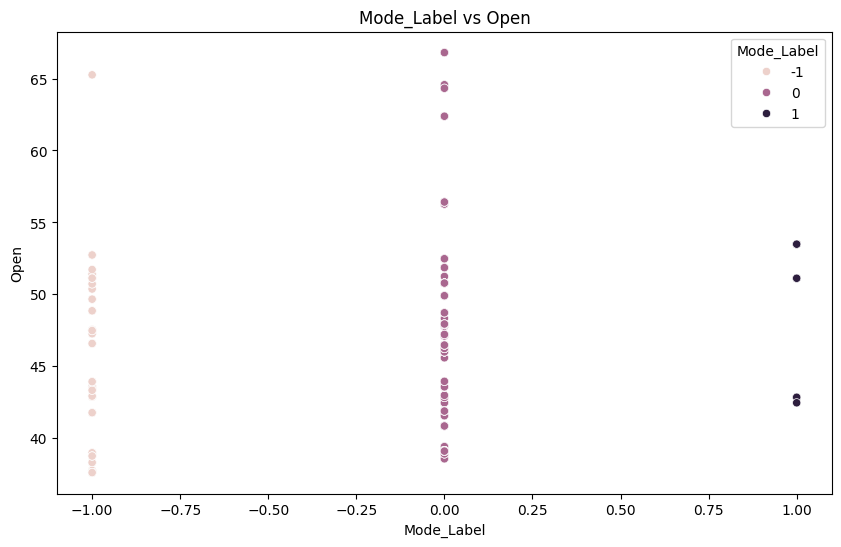

In [ ]:
# Comparing the Mode_Label to Open
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Mode_Label', y = 'Open', hue = 'Mode_Label')
plt.title('Mode_Label vs Open')
plt.xlabel('Mode_Label')
plt.ylabel('Open')
plt.show()

We've made the data very thin, but I think it makes more sense this way. Now, with the exception of one outlier in the negatives, the Open for the positive sentiment is higher. But the neutral is still the highest.

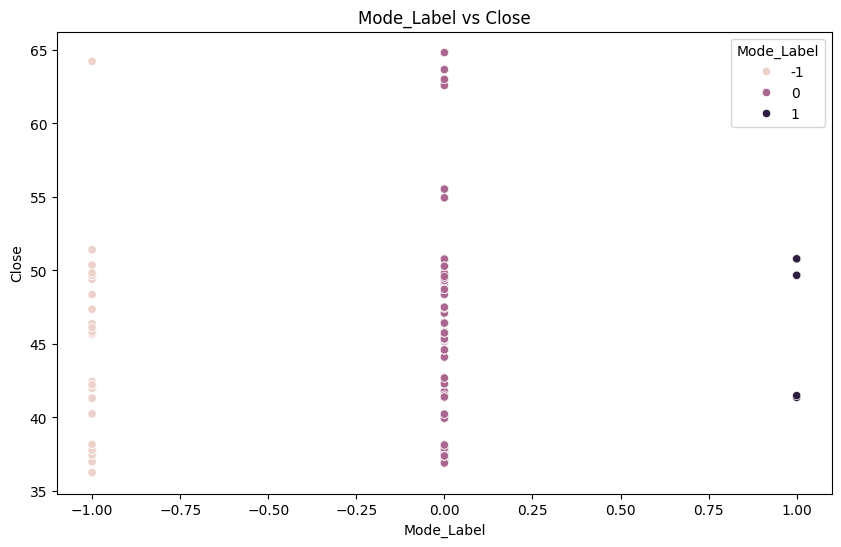

In [ ]:
# Comparing the Mode_Label to Close
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Mode_Label', y = 'Close', hue = 'Mode_Label')
plt.title('Mode_Label vs Close')
plt.xlabel('Mode_Label')
plt.ylabel('Close')
plt.show()

This one still doesn't make any sense. I would assume the closing price for days when the news sentiment was overall positive would be higher, but that is apparently not the case.

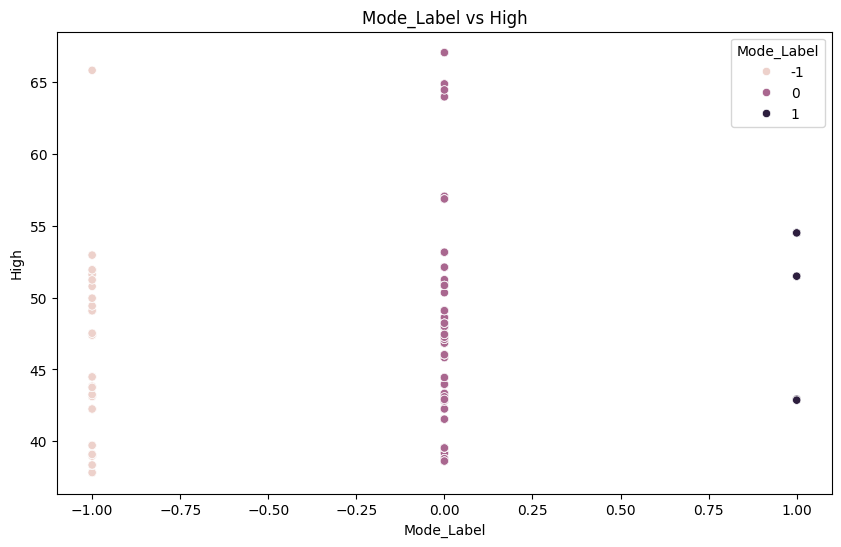

In [ ]:
# Comparing the Mode_Label to High
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Mode_Label', y = 'High', hue = 'Mode_Label')
plt.title('Mode_Label vs High')
plt.xlabel('Mode_Label')
plt.ylabel('High')
plt.show()

Same with this one.

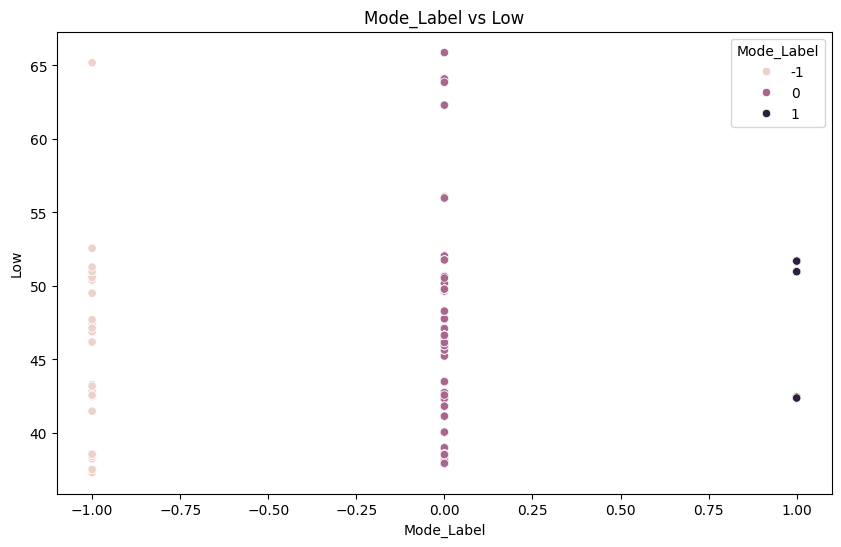

In [ ]:
# Comparing the Mode_Label to Low
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Mode_Label', y = 'Low', hue = 'Mode_Label')
plt.title('Mode_Label vs Low')
plt.xlabel('Mode_Label')
plt.ylabel('Low')
plt.show()

And same with this one. Again, there just doesn't appear to be any correlation. But let's check the heat map again.

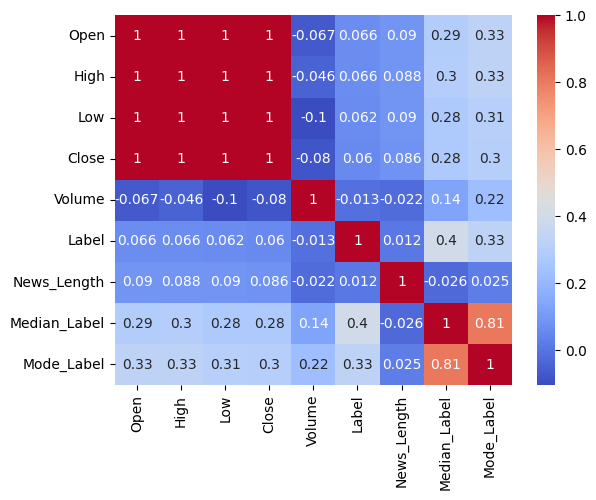

In [ ]:
# Plotting the correlation matrix
corr_matrix = data.drop(columns=['Date', 'News']).corr() # Recalculating the corr_matrix so that it includes my new column
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

Well, now this is interesting! My Mode_Label has a much, much higher correlation with the Open, Close, High, and Low prices than either the original label OR than my Median_Label. So it appears Mode_Label is the one to have selected! It's not a strong correlation, but it's a positive correlation.  And there also appears to be a positive correlation with volume, which would indicate that people trade more on positive news and less on negative news. Not sure that makes sense, but that's what our correlation matrix is showing.

Now I realize that I have multiple values for each day, where the only difference is the new article text. If I were going to continue down this road, I would concatenate the news article column and use the summarized Mode_Label to do the analysis. But I'm very worried that that approach would greaty reduce what is already a very, very small data set.  So I'm not going to do that. But I'll keep in mind that it's the summarized value for the articles that actually has a correlation, not any individual article's Label value.


## **Data Preprocessing**

It is important to do the data preprocessing to clean the data before doing the train test split and before using it in either Word2Vec or Glove. I'll do that now before doing the train test split.

It's also important that I DON'T used this cleaned data in the Sentence Transformer. The Sentence Transformer is sophisticated enough to benefit from the additional context provided by punctuation and capitalization. And I don't need to do dimensionality reduction, as I do for Word2Vec and Glove.


### Removing special characters

In [ ]:
# Defining a function to remove special characters
def remove_special_characters(text):
    # Replace non alpha numeric characters with a blank string
    new_text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['News'].apply(remove_special_characters)

In [ ]:
# Checking some of the cleaned data
data['cleaned_text'].head()

,cleaned_text
0,The tech sector experienced a significant decline in the aftermarket following Apple s Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo and TSMC saw their stocks drop in response to Apple s downward revision of its revenue expectations for the quarter previously announced in January
1,Apple lowered its fiscal Q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iPhone sales The announcement caused a significant drop in Apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as Nasdaq 10
2,Apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in China and fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks Apple s shares fell 8 5 in post market trading while Asian suppliers like Hon
3,This news article reports that yields on long dated U S Treasury securities hit their lowest levels in nearly a year on January 2 2019 due to concerns about the health of the global economy following weak economic data from China and Europe as well as the partial U S government shutdown Apple
4,Apple s revenue warning led to a decline in USD JPY pair and a gain in Japanese yen as investors sought safety in the highly liquid currency Apple s underperformance in Q1 with forecasted revenue of 84 billion compared to analyst expectations of 91 5 billion triggered risk aversion mood in markets


### Lowercasing

In [ ]:
# Changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# Checking some of the cleaned data
data['cleaned_text'].head()

,cleaned_text
0,the tech sector experienced a significant decline in the aftermarket following apple s q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo and tsmc saw their stocks drop in response to apple s downward revision of its revenue expectations for the quarter previously announced in january
1,apple lowered its fiscal q1 revenue guidance to 84 billion from earlier estimates of 89 93 billion due to weaker than expected iphone sales the announcement caused a significant drop in apple s stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as nasdaq 10
2,apple cut its fiscal first quarter revenue forecast from 89 93 billion to 84 billion due to weaker demand in china and fewer iphone upgrades ceo tim cook also mentioned constrained sales of airpods and macbooks apple s shares fell 8 5 in post market trading while asian suppliers like hon
3,this news article reports that yields on long dated u s treasury securities hit their lowest levels in nearly a year on january 2 2019 due to concerns about the health of the global economy following weak economic data from china and europe as well as the partial u s government shutdown apple
4,apple s revenue warning led to a decline in usd jpy pair and a gain in japanese yen as investors sought safety in the highly liquid currency apple s underperformance in q1 with forecasted revenue of 84 billion compared to analyst expectations of 91 5 billion triggered risk aversion mood in markets


### Removing extra whitespace

In [ ]:
# Removing extra whitespace
data['cleaned_text'] = data['cleaned_text'].str.strip()

### Removing Stop Words

In [ ]:
# Defining a function to remove stopwords from the NLTK library
def remove_stopwords(text):
  # splitting text into separate words
  words = text.split()

  # removing English stopwords
  new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

  return new_text

In [ ]:
# Applying the function to remove stop words
data['cleaned_text_no_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# Checking the cleaned text
data['cleaned_text_no_stopwords'].head()

,cleaned_text_no_stopwords
0,tech sector experienced significant decline aftermarket following apple q1 revenue warning notable suppliers including skyworks broadcom lumentum qorvo tsmc saw stocks drop response apple downward revision revenue expectations quarter previously announced january
1,apple lowered fiscal q1 revenue guidance 84 billion earlier estimates 89 93 billion due weaker expected iphone sales announcement caused significant drop apple stock price negatively impacted related suppliers leading broader market declines tech indices nasdaq 10
2,apple cut fiscal first quarter revenue forecast 89 93 billion 84 billion due weaker demand china fewer iphone upgrades ceo tim cook also mentioned constrained sales airpods macbooks apple shares fell 8 5 post market trading asian suppliers like hon
3,news article reports yields long dated u treasury securities hit lowest levels nearly year january 2 2019 due concerns health global economy following weak economic data china europe well partial u government shutdown apple
4,apple revenue warning led decline usd jpy pair gain japanese yen investors sought safety highly liquid currency apple underperformance q1 forecasted revenue 84 billion compared analyst expectations 91 5 billion triggered risk aversion mood markets


### Stemming

In [ ]:
# Loaeding the Porter Stemmer
ps = PorterStemmer()

In [ ]:
# Defining a function to perform stemming
def apply_ps(text):
  # split text into separate words
  words = text.split()

  # apply stemming to each word
  new_text = ' '.join([ps.stem(word) for word in words])

  return new_text

In [ ]:
# Applying the function to perform stemming
data['final_cleaned'] = data['cleaned_text_no_stopwords'].apply(apply_ps)

In [ ]:
# Checking the final cleaned text
data['final_cleaned'].head()

,final_cleaned
0,tech sector experienc signific declin aftermarket follow appl q1 revenu warn notabl supplier includ skywork broadcom lumentum qorvo tsmc saw stock drop respons appl downward revis revenu expect quarter previous announc januari
1,appl lower fiscal q1 revenu guidanc 84 billion earlier estim 89 93 billion due weaker expect iphon sale announc caus signific drop appl stock price neg impact relat supplier lead broader market declin tech indic nasdaq 10
2,appl cut fiscal first quarter revenu forecast 89 93 billion 84 billion due weaker demand china fewer iphon upgrad ceo tim cook also mention constrain sale airpod macbook appl share fell 8 5 post market trade asian supplier like hon
3,news articl report yield long date u treasuri secur hit lowest level nearli year januari 2 2019 due concern health global economi follow weak econom data china europ well partial u govern shutdown appl
4,appl revenu warn led declin usd jpi pair gain japanes yen investor sought safeti highli liquid currenc appl underperform q1 forecast revenu 84 billion compar analyst expect 91 5 billion trigger risk avers mood market


Having now done the text pre processing, I can do my train test split.

In [ ]:
# First I'll create my X and y by dropping Labels. I don't know if the Median_Label and Mode_Label will influence my model and expose data, so I'll get rid of those too
X = data.drop(columns = ['Label', 'Median_Label', 'Mode_Label'])
y = data['Label']


In [ ]:
# Next I'll split the data into train and temporary sets with 80% train and 20% temp with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# And then I'll split the temp set into validation and test sets (50% val and 50% test, which would each be 10% of the data) with stratification
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42, stratify = y_temp)

# Checking the shape of the splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (279, 11) (279,)
Validation set shape: (35, 11) (35,)
Test set shape: (35, 11) (35,)


## **Word Embeddings**

## **Sentiment Analysis**

### Text Vectorization - Word2Vec

In [ ]:
# Creating a list of all words in the data
words_list = [item.split(" ") for item in data['final_cleaned'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_w2v = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window = 5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_w2v.wv.index_to_key)))

Length of the vocabulary is 2580


So our Word 2 Vec model's vocabulary size is 2,580.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_w2v.wv[word]

array([ 3.17787984e-03,  7.68626109e-03, -7.44433200e-04,  7.36261485e-03,
       -8.00063659e-04, -1.07426597e-02,  8.28359183e-03,  2.01915354e-02,
        2.87933112e-03, -9.60820355e-04,  1.07140676e-03, -7.87102524e-03,
        1.00075745e-03,  3.32506839e-03, -1.01001412e-02, -7.46218488e-03,
        6.55545574e-03,  8.32991092e-04,  4.72798059e-03, -4.15372895e-03,
       -5.28542604e-03, -1.98025163e-03,  1.06563652e-02,  5.54775994e-04,
        1.17764184e-02,  2.72991462e-03, -1.00933081e-02, -3.58122610e-03,
       -5.73165528e-03, -1.00631407e-02,  6.21274533e-03, -4.33037116e-04,
       -5.18359360e-04,  2.26652063e-03, -5.23295486e-03,  4.92663262e-03,
        2.69148848e-03, -1.46021312e-02, -2.03934172e-03, -4.46789712e-03,
       -2.22914084e-03, -1.91033829e-03,  5.33543620e-03, -8.58830847e-03,
        6.21286174e-03,  1.22022880e-02, -1.61368540e-03,  1.28667278e-03,
       -4.03050845e-03,  6.96196361e-03,  1.19188114e-03, -1.75402476e-03,
       -6.37217658e-03,  

In [ ]:
# Checking the top 5 similar words to the word "stock" using cosine similarity
similar = model_w2v.wv.most_similar(word, topn = 5)
print(similar)

[('appl', 0.9436020255088806), ('trade', 0.9341640472412109), ('compani', 0.9289208054542542), ('year', 0.9250203967094421), ('servic', 0.9230667352676392)]


Interesting that Apple and company were similar to stock. The other weirds seem a little odd to me and not too similar.

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_w2v.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_w2v.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vec_dict = dict(zip(words, wvs))

In [ ]:
# Creating the function to calculate the Word 2 Vec vector for a given document
def avg_vec_Word2Vec(doc):
  # initializing a feature vector for the sentence
  feature_vec = np.zeros(vec_size, dtype = 'float64')

  # creating a list of words in the sentence that are present in the model vocabulary
  words_in_vocab = [word for word in doc.split() if word in words]

  # adding the vector representation of the words
  for word in words_in_vocab:
    feature_vec += np.array(word_vec_dict[word])

  # dividing by the number of words to get the average vector
  if len(words_in_vocab) != 0:
    feature_vec /= len(words_in_vocab)

  return feature_vec

In [ ]:
# Creating a dataframe of vectorized documents
df_w2v = pd.DataFrame(data['final_cleaned'].apply(avg_vec_Word2Vec).tolist(), columns=['Feature'+str(i) for i in range(vec_size)])
df_w2v

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature290,Feature291,Feature292,Feature293,Feature294,Feature295,Feature296,Feature297,Feature298,Feature299
0,0.000373,0.004661,-0.000904,0.004028,-0.000662,-0.005501,0.003939,0.010694,0.001904,0.000219,...,-0.000537,0.007191,0.005393,0.001618,0.005834,0.007027,0.000487,-0.002452,0.003095,-0.001351
1,0.000616,0.005190,-0.000262,0.004192,-0.001089,-0.006295,0.004106,0.011636,0.002357,0.000009,...,-0.000393,0.007738,0.006254,0.001184,0.006094,0.008019,0.001102,-0.003070,0.003622,-0.001241
2,0.000156,0.004501,-0.000314,0.003496,-0.000709,-0.005707,0.003263,0.010506,0.002014,0.000007,...,-0.000654,0.006767,0.005580,0.001350,0.005081,0.006721,0.001310,-0.003469,0.003126,-0.001417
3,0.000486,0.004358,-0.000253,0.003505,-0.000487,-0.005834,0.002555,0.010363,0.001941,-0.000456,...,-0.000076,0.006307,0.005534,0.000521,0.004983,0.006692,0.000801,-0.002140,0.002785,-0.001092
4,0.000901,0.003735,-0.000587,0.003224,-0.000200,-0.005180,0.002484,0.009115,0.001760,0.000440,...,-0.001039,0.006065,0.004699,0.001223,0.004718,0.006198,0.000538,-0.002030,0.002236,-0.000991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.000377,0.001706,0.000205,0.001415,0.000017,-0.002144,0.000714,0.003702,0.000903,-0.000019,...,0.000248,0.002896,0.001788,0.000944,0.001970,0.002320,0.000038,-0.000652,0.000708,-0.001004
345,-0.000305,0.003361,-0.000593,0.001984,-0.000080,-0.003367,0.002328,0.007392,0.001511,-0.000526,...,-0.000200,0.005050,0.003571,0.000687,0.003644,0.004306,0.000813,-0.001578,0.002742,-0.000660
346,0.000532,0.003960,0.000124,0.002799,-0.000618,-0.004621,0.002824,0.008119,0.001830,-0.000737,...,-0.000367,0.005069,0.004510,0.001243,0.003973,0.005816,0.000494,-0.002069,0.002477,-0.001231
347,-0.000163,0.003887,-0.000375,0.003168,-0.000289,-0.004988,0.003412,0.009583,0.001605,0.000184,...,-0.000340,0.006102,0.004310,0.001312,0.004949,0.005798,0.000929,-0.002198,0.003060,-0.001894


### Text Vectorization - GloVe

In [ ]:
# Converting the Standford GloVe model vector format to Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '/content/drive/MyDrive/glove.6B.100d.txt'
word2vec_output_file = '/content/drive/MyDrive/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
print("Conversion completed successfully")

<ipython-input-58-106a1c990597>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


Conversion completed successfully


In [ ]:
# Importing the key vectors class to work with word vectors
from gensim.models import KeyedVectors

# Loading the Stanford GloVe model
filename = '/content/drive/MyDrive/glove.6B.100d.txt.word2vec'
model_glove = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_glove.index_to_key)))

Length of the vocabulary is 400000


So our model_glove has 400,000 vectors in it!

In [ ]:
# Checking the word embedding of a random word (this is still using the word "stock" because I have not re-defined the variable "word")
model_glove[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the top 5 most similar words to the word "stock" (also using cosine similarity)
result = model_glove.most_similar(word, topn = 5)
print(result)

[('shares', 0.8525474667549133), ('stocks', 0.8309943079948425), ('market', 0.7991610765457153), ('exchange', 0.784952700138092), ('trading', 0.7632874846458435)]


Interesting that this model seems to have much, much better at finding similar words.

In [ ]:
# Getting the list of words
words_glove = model_glove.index_to_key

# Creating a dictionary of word vectors
glove_word_vec_dict = dict(zip(model_glove.index_to_key, list(model_glove.vectors)))
glove_word_vec_dict

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
# Setting the vector size
vec_size = 100

In [ ]:
# Creating a function to calculate the GloVe vector for a specific document
def avg_vec_GloVe(doc):
  # initializing a feature vector for the document
  feature_vec = np.zeros(vec_size, dtype = 'float64')

  # creating a list of words in the sentence that are present in the model vocabulary
  words_in_vocab = [word for word in doc.split() if word in words_glove]

  # adding the vector representations of the words
  for word in words_in_vocab:
    feature_vec += np.array(glove_word_vec_dict[word])

  # dividing by the number of words to get the average vector
  if len(words_in_vocab) != 0:
    feature_vec /= len(words_in_vocab)

  return feature_vec

In [ ]:
# Creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(data['final_cleaned'].apply(avg_vec_GloVe).tolist(), columns=['Feature'+str(i) for i in range(vec_size)])
df_glove

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99
0,0.021671,0.096785,-0.047464,-0.066726,-0.215078,-0.603108,-0.089054,-0.001979,0.114239,-0.132121,...,-0.016118,0.282037,-0.146394,-0.217284,-0.137730,0.162514,0.208869,0.056668,0.186156,-0.025540
1,0.171825,0.341351,0.234650,-0.042054,-0.082840,-0.600302,-0.060674,-0.101788,-0.159387,0.023604,...,0.001762,0.271578,-0.190244,-0.136070,-0.442046,0.225178,0.175980,-0.036701,0.410090,-0.159631
2,0.010512,0.270341,0.301482,-0.087113,0.075485,-0.476547,-0.039534,-0.014161,-0.123561,-0.054536,...,0.113562,0.199301,-0.095302,-0.220799,-0.559601,0.130351,0.039756,-0.088995,0.484577,-0.204774
3,-0.147407,0.226970,0.377158,0.184659,-0.110523,-0.447424,-0.103314,0.033698,-0.021951,-0.041905,...,0.031969,0.314802,-0.276519,0.034750,-0.347012,0.131816,0.201519,-0.220721,0.328415,-0.101222
4,0.040798,0.198312,0.071460,0.037332,-0.098294,-0.407203,-0.078844,-0.102327,-0.132380,-0.031861,...,0.041134,0.188611,-0.051261,-0.364269,-0.216124,0.242409,0.243280,-0.071136,0.173813,-0.131392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.133417,0.058861,0.415255,-0.291097,0.051498,0.079182,0.057609,0.127537,-0.074177,-0.070428,...,0.306373,-0.166262,0.083386,-0.120771,-0.347820,0.049615,-0.054991,-0.299478,0.437251,0.188692
345,0.159967,0.246612,0.288849,0.093632,0.043483,-0.284527,-0.167188,-0.049947,-0.246812,-0.088806,...,0.042174,0.246746,-0.054319,-0.047361,-0.572373,0.368322,0.077437,0.020181,0.441181,0.015956
346,0.043433,0.127144,0.151791,-0.053902,-0.067352,-0.187623,-0.020754,0.138385,-0.354622,-0.084654,...,-0.066027,0.240859,-0.119884,-0.026659,-0.428011,0.054745,-0.025141,-0.129436,0.258558,-0.027775
347,-0.098248,0.090049,0.181622,-0.028409,-0.128997,-0.497643,-0.247336,-0.034014,-0.103773,-0.195073,...,0.012848,0.070933,-0.053851,-0.265540,-0.415342,0.111974,0.295720,-0.207213,0.378713,0.026234


### Using Sentence Transformer

Now we'll use sentence transformer. Again for sentence transformer, it's important to use the original text and not the cleaned text.  This model does not need dimensionality reduction, and can actually learn from the complexity removed in the data cleaning for Word 2 Vec and GloVe.

In [ ]:
# Defining the model (we'll use all-MiniLM-L6-v2 because I asked Copilot, and it told me that's the best model to use for my size machine on Google Colab)
model_trans = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Basic Examples

In [ ]:
model_trans.encode(['Hi, my name is Sherri!'])

array([[-4.02458832e-02, -4.38074283e-02, -4.59285267e-02,
         3.10709253e-02, -1.04029007e-01, -3.43814463e-04,
         7.86441341e-02,  1.85645260e-02,  3.14662941e-02,
         3.01963463e-02, -2.19371635e-02, -6.81224912e-02,
         5.78059070e-03, -5.14821485e-02, -1.03118701e-03,
        -1.00437561e-02,  5.26667759e-03,  2.26493850e-02,
        -7.69035816e-02, -5.11081479e-02, -1.44213839e-02,
         2.62865610e-03, -6.71250895e-02, -4.43804171e-03,
        -7.32251853e-02,  3.49272341e-02, -8.16343538e-03,
         9.55365598e-02, -6.62109554e-02, -1.16076432e-01,
         5.84530532e-02,  4.44562212e-02,  5.97315431e-02,
         6.59619421e-02,  1.33655523e-03,  4.08434868e-02,
        -1.26068547e-01, -6.90163076e-02, -4.86053433e-03,
        -3.51813436e-03, -5.99319451e-02, -6.19084686e-02,
        -3.23626027e-02, -1.00811915e-02, -4.50277030e-02,
         5.19477576e-03,  3.00368071e-02,  7.16869235e-02,
         4.68332842e-02,  1.25660291e-02, -1.02341697e-0

In [ ]:
# Defining a function to compute the cosine similarity between two embedding vectors
def cosine_score(text):
  # encoding the text
  embeddings = model_trans.encode(text)

  # calculating the L2 norm of the embedding vector
  norm1 = np.linalg.norm(embeddings[0])
  norm2 = np.linalg.norm(embeddings[1])

  # computing the cosine similarity
  cosine_sim_score = ((np.dot(embeddings[0], embeddings[1]))/ (norm1 * norm2))

  return cosine_sim_score

In [ ]:
# Checking the cosine similarity of 2 sentences
sentence_1 = "The cat is on the mat."
sentence_2 = "The mat has a cat on it."

cosine_score([sentence_1, sentence_2])

0.9624443

In [ ]:
# Checking the cosine similarity or 2 more sentences
sentence_1 = "The rain in Spain stays mainly on the plain."
sentence_2 = "Do unto others as you would have done to you."

cosine_score([sentence_1, sentence_2])

-0.0025815088

Okay, my two similar sentences have a 96.2% similarity score! That's great. Now let's check two totally unrelated sentences to make sure they have a much lower score.

### Building the models

Choosing the Model to Use:
I need to use a classifier rather than a regressor, because the target variable is not a continuous number. I am going to try a Gradient Boosting Classifier because I think they sometimes have better performance than the Random Forest. They also handle mixed data types well. Additionally, Gradient Boosting can capture complex patterns in the data.

I did, indeed, start with a Gradient Boosting model. But as you can see from the results in Model 1, my Gradient Boosting model did not deal well with the slight class imbalance. So I switched to a Random Forest model because I can use the class weights parameter to deal with the imbalance.

Choosing the Metric to Use:

*   I am going to use accuracy because it provides a straightforward meausre of overall performance.
*   Because my dataset is slightly imbalanced, I'm also going to look at f1, which balances precision and recall and provides a more nuanced evaluation of my models' performance.



#### Starting with Word 2 Vec and GloVe


In [ ]:
# Creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
  cm = confusion_matrix(actual, predicted)

  plt.figure(figsize = (5, 4))
  sns.heatmap(cm, annot = True, fmt = 'g')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

##### Model 1: Gradient Boosting with Word 2 Vec

In [ ]:
# Storing the independent variable
X_w2v = df_w2v.copy()

# Storing the target variable
y_w2v = data['Label']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y_w2v, test_size = 0.25, random_state = 42, stratify = y_w2v)

In [ ]:
# Building the model
gb_w2v = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.001, max_depth = 3, random_state = 42)
gb_w2v.fit(X_train, y_train)

# Fitting the model on the train data
gb_w2v_train_pred = gb_w2v.predict(X_train)

In [ ]:
# Predicting on the train data
y_pred_train = gb_w2v.predict(X_train)

# Predicting on the text data
y_pred_test = gb_w2v.predict(X_test)

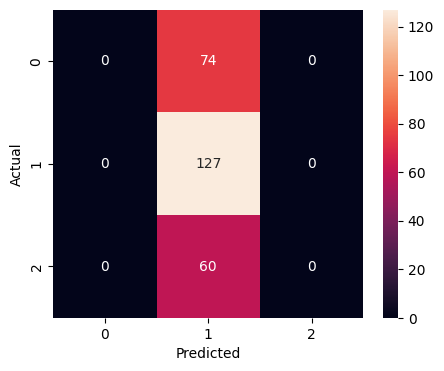

In [ ]:
# Plotting the confusion matrix
plot_confusion_matrix(y_train, y_pred_train)

Hmmm that did terribly!  This model predicted all of my weights as 1, which is the dominant class.  I wondered, above, whether the slightly imbalanced data set would affect my results.  It would appear that it certainly has.  Rather than attempting to adjust this model, I'm going to build a Random Forest Classifier, instead, so that I can use the class weights parameter.

##### Model 2: RandomForestClassifier with Word 2 Vec

In [ ]:
# Building the model
rf_w2v = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42, class_weight = 'balanced')
rf_w2v.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [ ]:
# Fitting on the training data
rf_w2v_train_pred = rf_w2v.predict(X_train)

In [ ]:
# Predicting on the train data
y_pred_train = rf_w2v.predict(X_train)

# Predicting on the test data
y_pred_test = rf_w2v.predict(X_test)

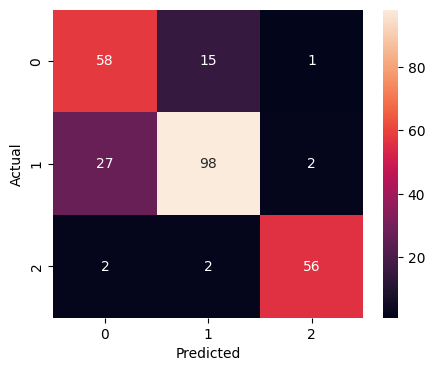

In [ ]:
# Plotting the confusion matrix
plot_confusion_matrix(y_train, y_pred_train)

That's better!!! So it appears that using the class weights with the Random Forest Classifier helped the model to do better at the smaller classes, as I hoped.

In [ ]:
# Classification report for the training data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          -1       0.67      0.78      0.72        74
           0       0.85      0.77      0.81       127
           1       0.95      0.93      0.94        60

    accuracy                           0.81       261
   macro avg       0.82      0.83      0.82       261
weighted avg       0.82      0.81      0.81       261



In [ ]:
# Classification report for the testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.35      0.52      0.42        25
           0       0.45      0.51      0.48        43
           1       0.50      0.05      0.09        20

    accuracy                           0.41        88
   macro avg       0.43      0.36      0.33        88
weighted avg       0.43      0.41      0.37        88



My model is performing okay on the train data, but pretty terribly on the testing data. I could keep tuning hyperparamters to see if I can make it better, but I'm not sure I want to invest more time on Word 2 Vec. I'll check out the other two models, and see if they look more promising.

##### Model 3: Random Forest with GloVe

In [ ]:
# Storing the independent variables
X = df_glove.copy()

# Storing the target variable
y = data['Label']

In [ ]:
# Splitting the data into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
# Building the model
rf_glove = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42, class_weight = 'balanced')
rf_glove.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [ ]:
# Fitting the model on training data
rf_glove_train_pred = rf_glove.predict(X_train)

In [ ]:
# Predicting on train data
y_pred_train = rf_glove.predict(X_train)

# Predicting on test data
y_pred_test = rf_glove.predict(X_test)

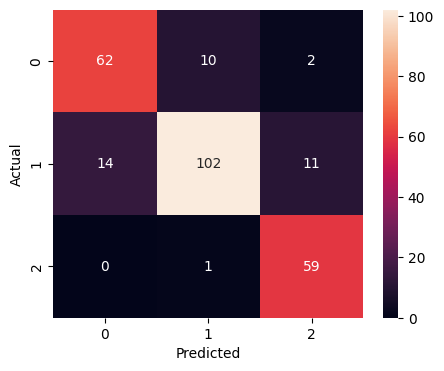

In [ ]:
# Plotting the confusion matrix for the training data
plot_confusion_matrix(y_train, y_pred_train)

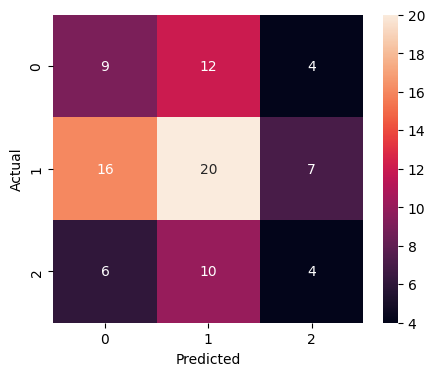

In [ ]:
# Plotting the confusion matrix for the testing data
plot_confusion_matrix(y_test, y_pred_test)

In [ ]:
# Printing the classification report for the training data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83        74
           0       0.90      0.80      0.85       127
           1       0.82      0.98      0.89        60

    accuracy                           0.85       261
   macro avg       0.85      0.87      0.86       261
weighted avg       0.86      0.85      0.85       261



In [ ]:
# Printing the classification report for the testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.29      0.36      0.32        25
           0       0.48      0.47      0.47        43
           1       0.27      0.20      0.23        20

    accuracy                           0.38        88
   macro avg       0.34      0.34      0.34        88
weighted avg       0.38      0.38      0.37        88



This model is equally bad!  But, again, before I do any model tuning to try to make one of these better, I'm going to use the Sentence Encoder and see if that does any better.

##### Model 4: Sentence Encoder using All-MiniLM-L6-v2

In [ ]:
# Defining the model
model_st = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
# Setting the device to GPU, if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Encoding the data set
embedding_matrix = model_st.encode(data['final_cleaned'], device = device, show_progress_bar = True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
# Printing the shape of the embedding matrix
embedding_matrix.shape

(349, 384)

So each of our 349 reviews is represented by a vector with 384 dimensions

In [ ]:
# Printing the embedding vector of the first review in the data set
embedding_matrix[0,:]

array([-4.35229763e-02, -3.29503864e-02,  1.18765794e-02, -2.81184018e-02,
       -4.92299162e-02, -3.22515592e-02,  6.49221689e-02,  8.59606043e-02,
       -5.15838107e-03, -7.01681571e-03,  6.41607717e-02,  6.85862498e-03,
        5.48727531e-03, -1.17762843e-02, -2.30298601e-02, -6.20182194e-02,
        3.91359627e-03, -3.52361239e-02, -8.98560360e-02, -6.32310733e-02,
       -4.57197987e-02, -7.06844851e-02, -5.99570796e-02,  2.73746364e-02,
       -1.07715186e-02, -3.64985615e-02,  1.46401199e-02,  7.55968913e-02,
        4.79060449e-02, -1.22141279e-01, -5.15050143e-02,  1.34289816e-01,
        4.91506606e-02,  3.63531373e-02,  1.16165318e-02,  1.05562992e-02,
       -6.83384074e-04, -4.49275561e-02,  4.31671031e-02, -1.22120520e-02,
       -5.07503413e-02, -8.38373899e-02, -1.05264351e-01, -5.41448817e-02,
        7.20376968e-02, -6.95498362e-02, -4.93148565e-02,  2.94029117e-02,
        8.44291523e-02,  1.61983948e-02, -2.72225030e-02,  5.01877405e-02,
        6.29151147e-03,  

In [ ]:
# Splitting the data set
X = embedding_matrix
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(261, 384) (88, 384)
(261,) (88,)


In [ ]:
# Creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
  cm = confusion_matrix(actual, predicted)

  plt.figure(figsize = (5, 4))
  label_list = ['Negative', 'Neutral', 'Positive']
  sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [ ]:
# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42, class_weight = 'balanced')

In [ ]:
# Fitting on training data
rf_transformer.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [ ]:
# Predicting on training data
y_pred_train = rf_transformer.predict(X_train)

# Predicting on testing data
y_pred_test = rf_transformer.predict(X_test)

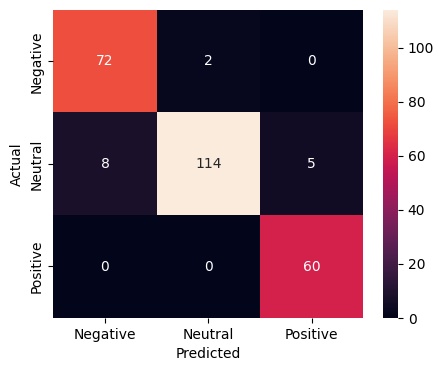

In [ ]:
# Plotting the training data confusion matrix
plot_confusion_matrix(y_train, y_pred_train)

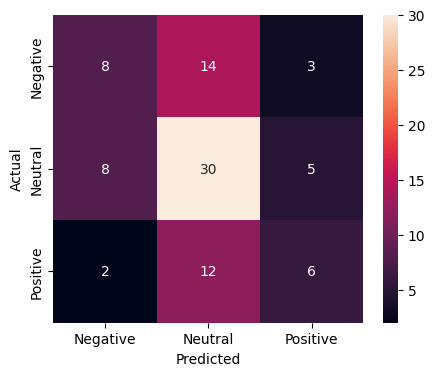

In [ ]:
# Plotting the testing data confusion matrix
plot_confusion_matrix(y_test, y_pred_test)

In [ ]:
# Printing the classification report for the training data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          -1       0.90      0.97      0.94        74
           0       0.98      0.90      0.94       127
           1       0.92      1.00      0.96        60

    accuracy                           0.94       261
   macro avg       0.94      0.96      0.94       261
weighted avg       0.95      0.94      0.94       261



In [ ]:
# Printing the classification report for the testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.44      0.32      0.37        25
           0       0.54      0.70      0.61        43
           1       0.43      0.30      0.35        20

    accuracy                           0.50        88
   macro avg       0.47      0.44      0.44        88
weighted avg       0.49      0.50      0.48        88



Okay, this was my best model, with the weighted average for the f1 score at 48%. So I'm going to use this one to build one more model and try to tune some parameters to see if I can make it better.  

##### Model 5: Tuned Model 4

In [ ]:
# Building the model
rf_transformer_1 = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42, class_weight = 'balanced')

In [ ]:
# Fitting on training data
rf_transformer_1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, random_state=42)

In [ ]:
# Predicting on training data
y_pred_train = rf_transformer_1.predict(X_train)

# Predicting on testing data
y_pred_test = rf_transformer_1.predict(X_test)

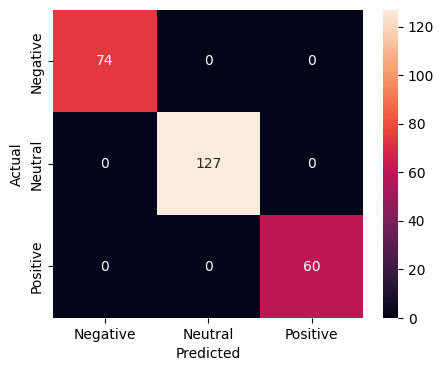

In [ ]:
# Plotting the training data confusion matrix
plot_confusion_matrix(y_train, y_pred_train)

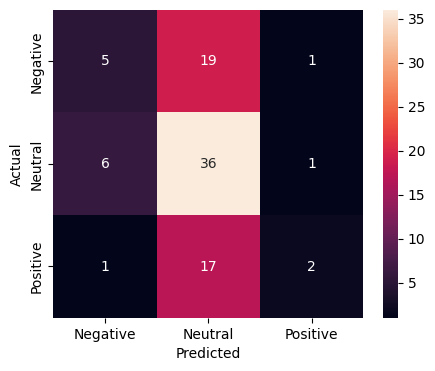

In [ ]:
# Plotting the testing data confusion matrix
plot_confusion_matrix(y_test, y_pred_test)

In [ ]:
# Printing the classification report for the training data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        74
           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        60

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [ ]:
# Printing the classification report for the testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.42      0.20      0.27        25
           0       0.50      0.84      0.63        43
           1       0.50      0.10      0.17        20

    accuracy                           0.49        88
   macro avg       0.47      0.38      0.35        88
weighted avg       0.48      0.49      0.42        88



Well, shoot! That clearly overfit and the weighted average for the f1 score got worse.  I'm going to try one more that's half way in between the 3 and 5 max depth.

##### Model 6: Same as 5 but with max depth at 5

In [ ]:
# Building the model
rf_transformer_2 = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, class_weight = 'balanced')

In [ ]:
# Fitting on training data
rf_transformer_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
# Predicting on training data
y_pred_train = rf_transformer_2.predict(X_train)

In [ ]:
# Predicting on testing data
y_pred_test = rf_transformer_2.predict(X_test)

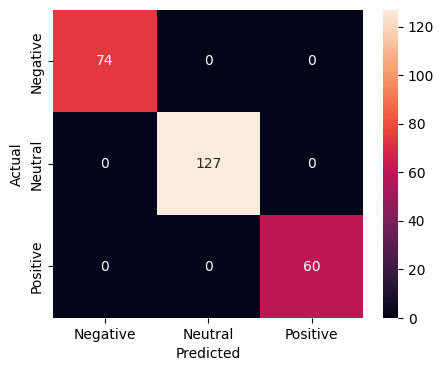

In [ ]:
# Plotting the training data confusion matrix
plot_confusion_matrix(y_train, y_pred_train)

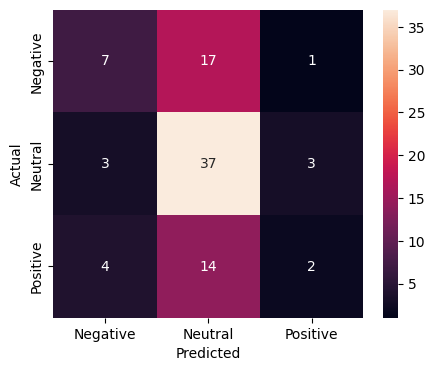

In [ ]:
# Plotting the testing data confusion matrix
plot_confusion_matrix(y_test, y_pred_test)

In [ ]:
# Printing the classification report for the training data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        74
           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        60

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [ ]:
# Printing the classification report for the testing data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.50      0.28      0.36        25
           0       0.54      0.86      0.67        43
           1       0.33      0.10      0.15        20

    accuracy                           0.52        88
   macro avg       0.46      0.41      0.39        88
weighted avg       0.48      0.52      0.46        88



Nope. Looks like the best was Model 4 with the max depth at 3.  I'm going to stop here.

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

In [1]:
# Checking to make sure CUDA is installed and running correctly
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [2]:
# Installing diskcache
!pip install diskcache

In [3]:
# Installing the right versions of everything
!pip install pandas==2.2.2 numpy==1.24.3 thinc==8.2.5 pytensor==2.27.1

!pip install nvidia-cublas-cu12==12.4.5.8 nvidia-cuda-cupti-cu12==12.4.127 nvidia-cuda-nvrtc-cu12==12.4.127 nvidia-cuda-runtime-cu12==12.4.127 nvidia-cudnn-cu12==9.1.0.70 nvidia-cufft-cu12==11.2.1.3 nvidia-curand-cu12==10.3.5.147 nvidia-cusolver-cu12==11.6.1.9

  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 \
  pip install llama-cpp-python==0.1.85 --no-deps --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.1.85-cp311-cp311-linux_x86_64.whl size=6624799 sha256=99b536852aed6db4debea93458eac1b9be10dff0854dfb06623e5863666a7e1d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_cquwnqm/wheels/64/84/0c/e1e21cef5bdf4bde1c07e1befbe0661ad7adfc1f10a2883641
Successfully built llama-cpp-python


#### Installing and Importing the necessary libraries

In [5]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

#### Loading the data

In [6]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importing the pandas library for data manipulation
import pandas as pd
# Loading the data, putting it into a pandas dataframe, with explicit dtype
# Assuming all columns are string type, modify if needed for other data types
news = pd.read_csv('/content/drive/MyDrive/stock_news.csv', dtype=str)

In [8]:
# Importing the json module, which I forgot to add above
import json

#### Loading the model

A note about model selection: I originally ran this code using the Llama model. However, I couldn't get it to work because the context window was too small, and my prompt and news articles are too big. So I switched it all out to Mistral because of the bigger context window.

In [9]:
# Loading the model, using Mistral
model_name = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [10]:
# Downloading a model from Hugging Face model hub
model_path = hf_hub_download(repo_id=model_name, filename=model_basename)

# Instantiating the model and adjusting the parameters
llm = Llama(model_path = model_path, n_ctx = 4096)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


#### Aggregating the data weekly

In [11]:
# Making a copy of the news data frame and calling it data so the provided code runs
data = news.copy()

# Converting the 'Date' column to datetime format
data["Date"] = pd.to_datetime(data['Date'])

In [12]:
# Grouping the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [13]:
# Concatenting all of the news articles each week into a new column called weekly_group with a double pipe || separator between articles
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


Wow! The weekly groupings have reduced the dataset down to 18 rows! This is exactly what I was afraid of and why I didn't group the data for the Machine Learning above. I was thinking of grouping by day, which would have been bigger than this weekly grouping but still too small for a Machine Learning model, I think. I don't think that data size will matter for this model, since it's already been trained on so much data though!

In [14]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [15]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [16]:
# Defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # finding the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # extracting the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [18]:
# Defining the response function
def response_1(prompt, review):
    full_prompt = f"Q: {prompt}\nReview: {review}\nA: "
    model_output = llm(
        prompt=full_prompt,
        max_tokens=128,  # increased token count for more room
        stop=["Q:"],   # removed "\n" to prevent premature stopping
        temperature=0.01,
        echo=False,
    )
    return model_output["choices"][0]["text"].strip()

In [25]:
# Defining the instruction for the model
instruction_1 = """
Role: You are an expert financial analyst specializing in news analysis and its impact on Apple stock.

Task: Analyze provided weekly news summary and provide top 3 positive and top 3 negative events affecting Apple's stock as a single, valid JSON object.

Instructions:
1. Carefully read weekly news summary.
2. Identify and extract 3 most significant positive events and 3 most significant negative events.
3. For each event, include short, succinct summary (max 3 words).
4. Respond with one single, unified and valid JSON object only.

Output: Return one valid JSON object with all 6 keys: "P1", "P2", "P3", "N1", "N2", and "N3", where each key maps to an event summary and P1 is the first positive event, P2 is the second, etc.

Example response:
{"P1": "summary", "P2": "summary", "P3": "summary", "N1": "summary", "N2": "summary", "N3": "summary"}
"""

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [26]:
# Selecting a single news article (the first) from the data frame
sample_news = weekly_grouped.iloc[0]['News']

# Passing the instruction and the sample news text to the response function
result = response_1(instruction_1, sample_news)

# Printing the result
print(result)

Llama.generate: prefix-match hit


{
"N1": "Apple lowers Q1 revenue forecast",
"N2": "Weak iPhone sales in China",
"N3": "Global economic slowdown fears",
"P1": "Roku offers premium channels on The Roku Channel",
"P2": "FDIC reviews CAMELS rating system",
"P3": "Gold prices reach six-month highs"
}


##### Checking the model output on the weekly data

In [27]:
# Applying the prompt and instruction to all the data
data_1['model_response'] = data_1['News'].apply(lambda x: response_1(instruction_1, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [28]:
# Viewing the head
data_1['model_response'].head()

,model_response
0,"{\n""N1"": ""Apple lowers Q1 revenue forecast"",\n..."
1,"{\n""P1"": ""5G smartphones release"",\n""P2"": ""AMS..."
2,"{\n""P1"": ""Netflix price increase"",\n""P2"": ""Chi..."
3,"{\n""P1"": ""SNB maintains negative rates"",\n""P2""..."
4,"{""P1"": ""Record revenue for LVMH from Chinese c..."


I see that my column has a bunch of \n values. I'll drop those out.

In [29]:
# Dropping the \n values
data_1['model_response'] = data_1['model_response'].str.replace('\n', '', regex = False)

In [30]:
# Looking at the header again
data_1['model_response'].head()

,model_response
0,"{""N1"": ""Apple lowers Q1 revenue forecast"",""N2""..."
1,"{""P1"": ""5G smartphones release"",""P2"": ""AMS sen..."
2,"{""P1"": ""Netflix price increase"",""P2"": ""Chinese..."
3,"{""P1"": ""SNB maintains negative rates"",""P2"": ""I..."
4,"{""P1"": ""Record revenue for LVMH from Chinese c..."


##### Formatting the model output

In [33]:
# Creating an array of the model response values
data_output_array = data_1['model_response'].values
print(data_output_array)

['{"N1": "Apple lowers Q1 revenue forecast","N2": "Weak iPhone sales in China","N3": "Global economic slowdown fears","P1": "Roku offers premium channels on The Roku Channel","P2": "FDIC reviews CAMELS rating system","P3": "Gold prices reach six-month highs"}'
 '{"P1": "5G smartphones release","P2": "AMS sensor partnership","P3": "Amazon growth potential"}{"N1": "Geely flat sales forecast","N2": "China trade war concerns","N3": "Roku price impact"}'
 '{"P1": "Netflix price increase","P2": "Chinese stimulus optimism","P3": "Verizon Apple Music deal"}{"N1": "Global economic concerns","N2": "Apple hiring cuts","N3": "Qualcomm patent loss"}'
 '{"P1": "SNB maintains negative rates","P2": "IBM beats earnings","P3": "Huawei expands in Europe"}{"N1": "White House cancels trade talks","N2": "Foxconn recruiting fewer employees","N3": "Amazon faces tax complications"}'
 '{"P1": "Record revenue for LVMH from Chinese customers", "P2": "Apple on track to double FY16 Services revenue by FY20", "P3": 

## **Conclusions and Recommendations**



*   I used several Machine Learning models to classify news text and predict the sentiment, and compared that sentiment to stock prices for the day.
*   The daily stock prices do not appear to be strongly correlated to the sentiment of a single news article.  I used an overall sentiment for the day's news (mode of all articles' sentiment for the day), and that did have a stronger correlation. But it made the data too thin to use with a Machine Learning model.  Weekly sentiment may theoretically demonstrate a stronger correlation, but that would make the data even thinner.
*   I recommend that the data be greatly amplified with much more data so that it can be grouped into an overall daily sentiment.  That sentiment can then be used to predict stock prices.
*   I then used an LLM to identify the top 3 positive and top 3 negative articles for each day, along with a summary of the article.
*   These summaries can be used to see the overall sentiment for a specific day.
*   I would also suggest to supplement this with something like a sentiment score for the day (positive, negative, or neutral).  This can also be used by the company to run through an ML model and assess the overall impact of the news' overall daily sentiment on stock price and determine whether there is a relationship.






<font size=6 color='blue'>Power Ahead</font>
___